In [1]:



import osmnx as ox
import matplotlib.pyplot as plt


In [9]:
import osmnx as ox
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def get_power_grid_data():
    # Define the bounding box for the continental US
    north, south, east, west = 42.03, 41.90, -87.60, -87.80 #49.3457868, 24.396308, -66.93457, -125.001635

    # Download infrastructure data from OpenStreetMap
    cf = '[“power”~”line”]'
    G = ox.graph_from_bbox(north, south, east, west, custom_filter=cf)#network_type='power')

    return G

# Function to visualize power grid infrastructure with edge color based on voltage
def visualize_power_grid(G):
    # Define color map for edge colors based on voltage
    edge_colors = [mcolors.to_hex((1, 0, 0, d.get('voltage', 0) / 1000)) for u, v, k, d in G.edges(keys=True, data=True)]

    # Plot the power grid infrastructure
    fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=1.5, node_size=0, show=False, close=False)

    # Set title and show plot
    plt.title("Power Grid Infrastructure in the Continental US")
    plt.tight_layout()
    plt.show()

# Example usage
power_grid_data = get_power_grid_data()
visualize_power_grid(power_grid_data)


/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_65904/2578633314.py:11: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(north, south, east, west, custom_filter=cf)#network_type='power')


ResponseStatusCodeError: 'overpass-api.de' responded: 400 Bad Request <?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
  <meta http-equiv="content-type" content="text/html; charset=utf-8" lang="en"/>
  <title>OSM3S Response</title>
</head>
<body>

<p>The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.</p>
<p><strong style="color:#FF0000">Error</strong>: line 1: parse error: Key expected - '“' found. </p>
<p><strong style="color:#FF0000">Error</strong>: line 1: parse error: '!', '~', '=', '!=', or ']'  expected - '“' found. </p>
<p><strong style="color:#FF0000">Error</strong>: line 1: parse error: Value expected - '”' found. </p>
<p><strong style="color:#FF0000">Error</strong>: line 1: parse error: ',' or ']' expected - '”' found. </p>
<p><strong style="color:#FF0000">Error</strong>: line 1: static error: For the attribute &quot;k&quot; of the element &quot;has-kv&quot; the only allowed values are non-empty strings. </p>

</body>
</html>


In [10]:
import osmnx as ox

# Define the bounding box for the area you're interested in
north, south, east, west = 49.3457868, 24.396308, -66.93457, -125.001635

# Define the custom filter to retrieve power grid data
custom_filter = 'power=line'

# Download the power grid infrastructure data using the custom filter
G = ox.graph_from_bbox(north, south, east, west, custom_filter=custom_filter)

# Visualize the power grid infrastructure
ox.plot_graph(G)


/var/folders/56/vhtxcmr565z5ksdt3g3px27w0000gq/T/ipykernel_65904/1370045745.py:10: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead.
  G = ox.graph_from_bbox(north, south, east, west, custom_filter=custom_filter)
/Users/ryanmc/opt/anaconda3/envs/spwxr/lib/python3.9/site-packages/osmnx/_overpass.py:211: UserWarning: This area is 5,849 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


ResponseStatusCodeError: 'overpass-api.de' responded: 400 Bad Request <?xml version="1.0" encoding="UTF-8"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
  <meta http-equiv="content-type" content="text/html; charset=utf-8" lang="en"/>
  <title>OSM3S Response</title>
</head>
<body>

<p>The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.</p>
<p><strong style="color:#FF0000">Error</strong>: line 1: parse error: Unknown type &quot;waypower&quot; </p>
<p><strong style="color:#FF0000">Error</strong>: line 1: parse error: An empty query is not allowed </p>
<p><strong style="color:#FF0000">Error</strong>: line 1: parse error: ';' expected - '=' found. </p>

</body>
</html>


In [17]:
place = {"country": "United States"}

# only get motorway ways
cf = '["power"~"line"]'
G = ox.graph_from_place(place, custom_filter=cf)
print(len(G), "power lines")

/Users/ryanmc/opt/anaconda3/envs/spwxr/lib/python3.9/site-packages/osmnx/_overpass.py:211: UserWarning: This area is 126,975 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


KeyboardInterrupt: 

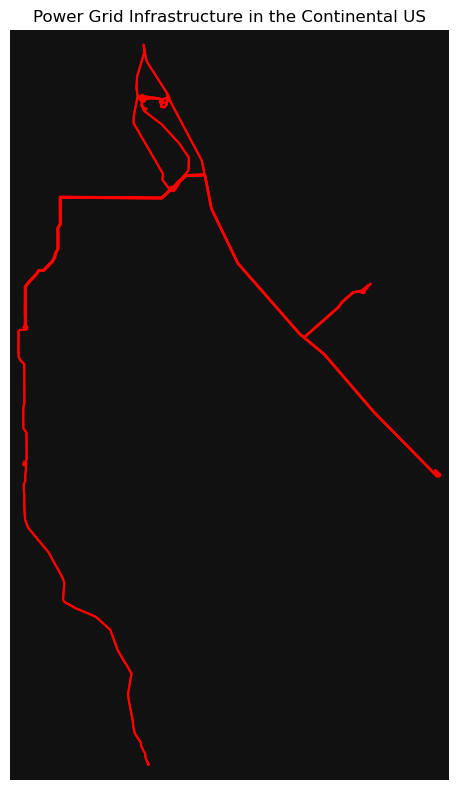

In [16]:
def visualize_power_grid(G):
    # Define color map for edge colors based on voltage
#     edge_colors = [mcolors.to_hex((1, 0, 0, d.get('voltage', 0) / 1000)) for u, v, k, d in G.edges(keys=True, data=True)]
    ec = ox.plot.get_edge_colors_by_attr(G, attr="voltage")

    # plot the graph with colored edges
    fig, ax = ox.plot_graph(G, node_size=5, edge_color=ec, edge_linewidth=1.5, bgcolor="k")
    
#     # Plot the power grid infrastructure
#     fig, ax = ox.plot_graph(G, edge_color=edge_colors, edge_linewidth=1.5, node_size=0, show=False, close=False)

    # Set title and show plot
    plt.title("Power Grid Infrastructure in the Continental US")
    plt.tight_layout()
    plt.show()

    
visualize_power_grid(G)